In [48]:
#import libraries
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import statistics

In [42]:
#load clean dataset
data = pd.read_csv("data.csv",index_col=0)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


In [24]:
#Create dataframe of holidays with date
superbowl = pd.DataFrame({
  'Holiday': 'Superbowl',
  'Date': pd.to_datetime(['2010-02-12','2011-02-11','2012-02-10','2013-02-08']),
})
laborday = pd.DataFrame({
  'Holiday': 'Laborday',
  'Date': pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07','2013-09-06']),
})
thanksgiving = pd.DataFrame({
  'Holiday': 'Thanksgiving',
  'Date': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23','2013-11-29']),
})
christmas = pd.DataFrame({
  'Holiday': 'Christmas',
  'Date': pd.to_datetime(['2010-12-24', '2011-12-23', '2012-12-21','2013-12-20']),
})
easter = pd.DataFrame({
  'Holiday': 'Easter',
  'Date': pd.to_datetime(['2010-04-02', '2011-04-22', '2012-04-06']),
})
holidays = pd.concat((superbowl, laborday, thanksgiving, christmas, easter))
holidays

,Holiday,Date
0,Superbowl,2010-02-12
1,Superbowl,2011-02-11
2,Superbowl,2012-02-10
3,Superbowl,2013-02-08
0,Laborday,2010-09-10
1,Laborday,2011-09-09
2,Laborday,2012-09-07
3,Laborday,2013-09-06
0,Thanksgiving,2010-11-26
1,Thanksgiving,2011-11-25


In [25]:
#Create dataframe of holidays weekly sales
weekly_holiday_sales = data.groupby(['Date','IsHoliday'])['Weekly_Sales'].sum().reset_index()
weekly_holiday_sales['Date'] = pd.to_datetime(weekly_holiday_sales['Date'])
weekly_holiday_sales.head()

,Date,IsHoliday,Weekly_Sales
0,2010-02-05,False,49750740.50
1,2010-02-12,True,48336677.63
2,2010-02-19,False,48276993.78
3,2010-02-26,False,43968571.13
4,2010-03-05,False,46871470.30


In [26]:
#Create dataframe of holidays sales
holiday_sales = weekly_holiday_sales.merge(holidays, on=['Date'], how='inner')
holiday_sales

,Date,IsHoliday,Weekly_Sales,Holiday
0,2010-02-12,True,48336677.63,Superbowl
1,2010-04-02,False,50423831.26,Easter
2,2010-09-10,True,45634397.84,Laborday
3,2010-11-26,True,65821003.24,Thanksgiving
4,2010-12-24,False,80931415.60,Christmas
5,2011-02-11,True,47336192.79,Superbowl
6,2011-04-22,False,48676692.06,Easter
7,2011-09-09,True,46763227.53,Laborday
8,2011-11-25,True,66593605.26,Thanksgiving
9,2011-12-23,False,76998241.31,Christmas


### Sales overview

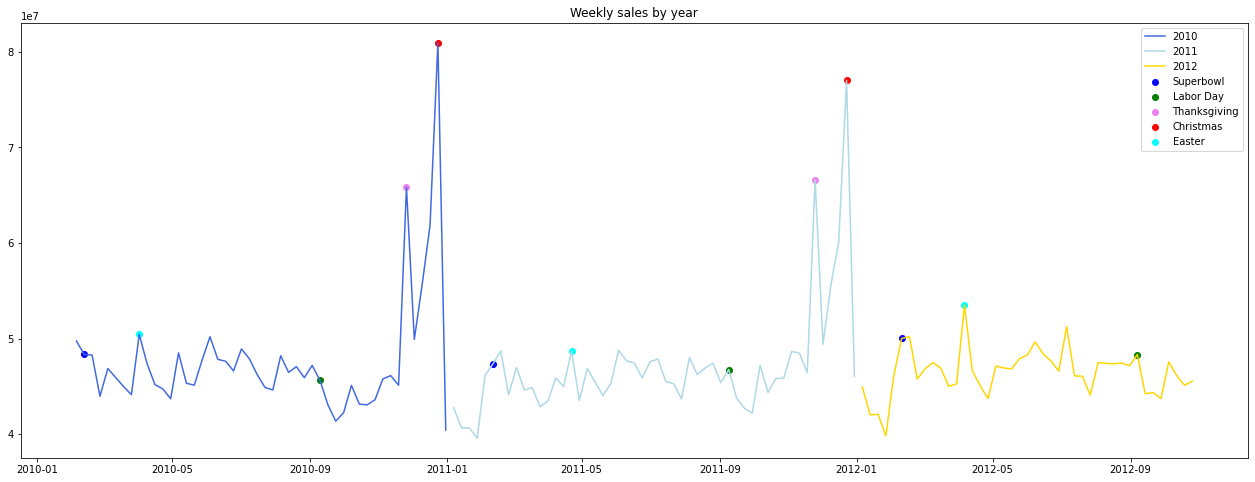

In [49]:
# Walmart Weekly Sales
plt.figure(figsize=(22,8))

#Sales by year
plt.plot(data[data.Year==2010].groupby(['Date'])['Weekly_Sales'].sum(),label='2010',color='royalblue')
plt.plot(data[data.Year==2011].groupby(['Date'])['Weekly_Sales'].sum(),label='2011',color='lightblue')
plt.plot(data[data.Year==2012].groupby(['Date'])['Weekly_Sales'].sum(),label='2012',color='gold')

#Indicate holiday sales
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Superbowl']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Superbowl']['Weekly_Sales'].tolist(),marker='o',color='blue',label='Superbowl')
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Laborday']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Laborday']['Weekly_Sales'].tolist(),marker='o',color='green',label='Labor Day')
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Thanksgiving']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Thanksgiving']['Weekly_Sales'].tolist(),marker='o',color='violet',label='Thanksgiving')
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Christmas']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Christmas']['Weekly_Sales'].tolist(),marker='o',color='red',label='Christmas')
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Easter']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Easter']['Weekly_Sales'].tolist(),marker='o',color='aqua',label='Easter')

plt.title('Weekly sales by year')
plt.legend(loc='best')
plt.show()

In [50]:
# Walmart Weekly Sales
weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales.describe()

,Weekly_Sales
count,143.00
mean,47113419.49
std,5444206.20
min,39599852.99
25%,44880587.54
50%,46243899.58
75%,47792024.64
max,80931415.60


### Factors correlation

Text(0.5, 1.0, 'Correlation Matrix')

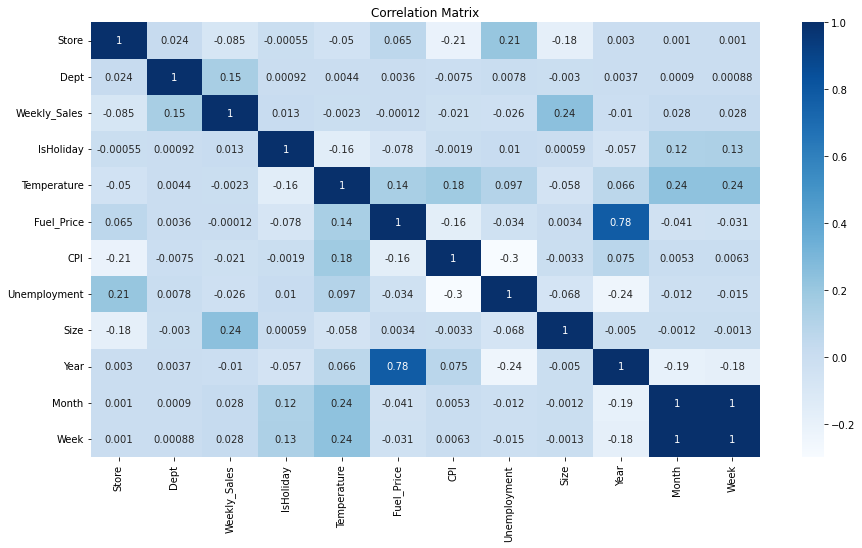

In [51]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.heatmap(data.corr(), cmap='Blues', annot=True, annot_kws={'size':10})
plt.title('Correlation Matrix')

### Depts performance

In [53]:
#Create a dataframe of dept weekly sales
dept_wk_sales = data.groupby(['Dept','Date']).Weekly_Sales.sum().unstack()
dept_wk_sales['avg by dept'] = [dept_wk_sales.iloc[r,:].mean() for r in range(len(dept_wk_sales))]
dept_wk_sales.head()

Date,2010-02-05 00:00:00,2010-02-12 00:00:00,2010-02-19 00:00:00,2010-02-26 00:00:00,2010-03-05 00:00:00,2010-03-12 00:00:00,2010-03-19 00:00:00,2010-03-26 00:00:00,2010-04-02 00:00:00,2010-04-09 00:00:00,...,2012-08-31 00:00:00,2012-09-07 00:00:00,2012-09-14 00:00:00,2012-09-21 00:00:00,2012-09-28 00:00:00,2012-10-05 00:00:00,2012-10-12 00:00:00,2012-10-19 00:00:00,2012-10-26 00:00:00,avg by dept
Dept,,,,,,,,,,,,,,,,,,,,,
1,881833.41,1457182.40,1118257.36,681391.58,762652.57,803886.93,846686.47,1045724.42,2451952.54,1518946.82,...,649190.54,700311.48,727323.11,740105.84,754344.66,855362.83,936707.78,1037182.46,1295180.09,864606.83
2,1997831.89,1839217.77,1961685.93,1859531.58,1957870.82,1908498.17,1848039.78,1826143.30,1957167.66,1903127.59,...,2086129.21,2076768.16,1896324.58,1891218.64,1871196.15,1988021.85,1854886.45,1879765.40,1871912.15,1962315.91
3,484368.90,429341.02,410399.14,415060.22,422680.37,402600.04,371295.10,366453.52,394383.53,363798.86,...,1645308.80,1024883.43,562621.87,409312.09,374436.87,376950.71,350316.41,348305.68,348032.25,530716.43
4,1205801.77,1075081.62,1113781.74,1075834.39,1145506.25,1083931.40,1064848.12,1059748.84,1159243.85,1118048.30,...,1245850.80,1291517.23,1140553.42,1131506.47,1104026.27,1207399.66,1136651.53,1131269.31,1151035.43,1168858.36
5,1116952.54,1148132.32,1110717.47,855568.94,930687.44,1086789.71,1063601.82,1597422.35,1455216.22,966470.35,...,711079.39,657423.35,689356.54,716140.77,966922.55,865522.70,792464.82,879453.35,884644.81,948303.21


In [54]:
dept_wk_sales['avg by dept'].describe()

count        81.00
mean     581676.89
std      724058.85
min         -35.96
25%       84524.03
50%      278523.91
75%      824457.26
max     3384219.17
Name: avg by dept, dtype: float64

In [55]:
#Top 10 depts average weekly sales
dept_wk_sales.iloc[:,-1].sort_values(ascending=False).head(10)

Dept
92   3384219.17
95   3142099.04
38   2749077.88
72   2137938.13
90   2035443.80
40   2020531.62
2    1962315.91
91   1515955.98
13   1379871.12
8    1358606.86
Name: avg by dept, dtype: float64

In [68]:
#Create dataframe for dept sales by year
dept2010 = dept_wk_sales.iloc[:,0:48]
dept2011 = dept_wk_sales.iloc[:,49:100]
dept2012 = dept_wk_sales.iloc[:,100:-2]

In [82]:
#Create new column of avg dept sales
dept2010['avg dept 2010'] = [dept2010.iloc[r,:].mean() for r in range(len(dept2010))]
dept2011['avg dept 2011'] = [dept2011.iloc[r,:].mean() for r in range(len(dept2011))]
dept2012['avg dept 2012'] = [dept2012.iloc[r,:].mean() for r in range(len(dept2012))]

/var/folders/c2/1tnqmf6d7bn3vn454gkflvgr0000gn/T/ipykernel_61734/261449848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept2010['avg dept 2010'] = [dept2010.iloc[r,:].mean() for r in range(len(dept2010))]
/var/folders/c2/1tnqmf6d7bn3vn454gkflvgr0000gn/T/ipykernel_61734/261449848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept2011['avg dept 2011'] = [dept2011.iloc[r,:].mean() for r in range(len(dept2011))]
/var/folders/c2/1tnqmf6d7bn3vn454gkflvgr0000gn/T/ipykernel_61734/261449848.py:3: Setti

In [87]:
#Create dataframe of top 20 depts
dept_rank = dept_wk_sales.iloc[:,-2].sort_values(ascending=False).head(20).to_frame().reset_index()
dept2010_rank = dept2010['avg dept 2010'].to_frame().reset_index()
dept2011_rank = dept2011['avg dept 2011'].to_frame().reset_index()
dept2012_rank = dept2012['avg dept 2012'].to_frame().reset_index()
d_rank = dept_rank.merge(dept2010_rank, on=['Dept'], how='inner').merge(dept2011_rank, on=['Dept'], how='inner').merge(dept2012_rank, on=['Dept'], how='inner')
d_rank.head()

,Dept,2012-10-26 00:00:00,avg dept 2010,avg dept 2011,avg dept 2012
0,92,3527936.66,3246616.16,3390975.54,3526226.29
1,95,3002617.27,3122050.83,3113585.18,3211646.97
2,38,2610575.62,2684485.63,2745909.91,2818833.34
3,90,2090093.94,1945934.90,2076578.31,2086315.82
4,40,2021902.02,2008647.65,1983805.65,2075653.21


Text(0.5, 1.0, 'Top 20 depts average weekly sales by year')

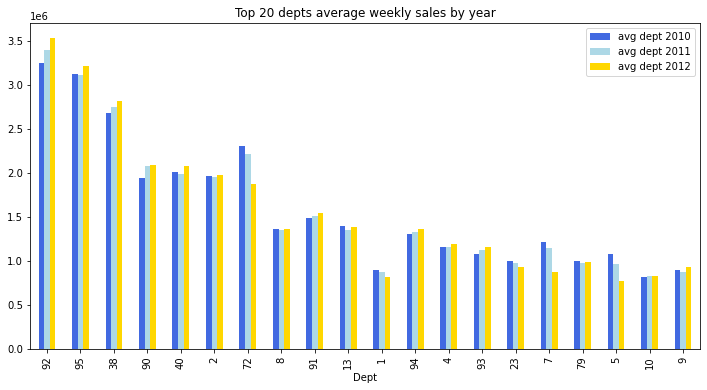

In [88]:
d_rank.set_index('Dept').drop(d_rank.columns[1], axis = 1).plot.bar(figsize=(12,6),color=['royalblue','lightblue','gold'])
plt.title('Top 20 depts average weekly sales by year')

In [58]:
#Create dataframe of thanksgiving & christmas sales
tg2010 = dept_wk_sales.iloc[:,42].to_frame().reset_index()
tg2011 = dept_wk_sales.iloc[:,94].to_frame().reset_index()
xmas2010 = dept_wk_sales.iloc[:,46].to_frame().reset_index()
xmas2011 = dept_wk_sales.iloc[:,98].to_frame().reset_index()
tg = tg2010.merge(tg2011, on=['Dept'], how='inner')
xmas = xmas2010.merge(xmas2011, on=['Dept'], how='inner')

In [61]:
tg.set_index('Dept',inplace=True)
tg['avg tg'] = [tg.iloc[r,:].mean() for r in range(len(tg))]

In [63]:
xmas.set_index('Dept',inplace=True)
xmas['avg xmas'] = [xmas.iloc[r,:].mean() for r in range(len(xmas))]

In [64]:
#Create dataframe of top 20 depts in thanksgiving & christmas
tg20 = tg.sort_values(by='avg tg',ascending=False).head(20)
xmas20 = xmas.sort_values(by='avg xmas',ascending=False).head(20)

<AxesSubplot:xlabel='Dept'>

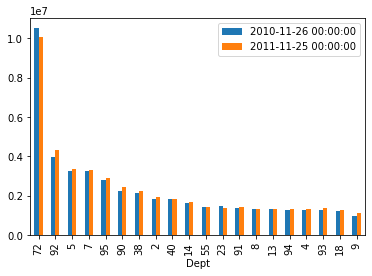

In [66]:
#thanksgiving top20 depts
tg20.drop(columns='avg tg').plot.bar()

<AxesSubplot:xlabel='Dept'>

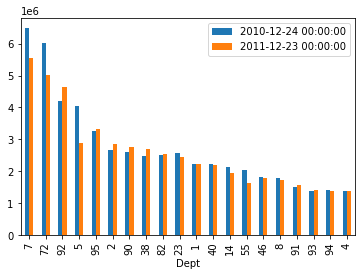

In [67]:
#christmas top20 depts
xmas20.drop(columns='avg xmas').plot.bar()

### Store type performance

In [89]:
store_by_wk = data.groupby(['Store','Date']).Weekly_Sales.sum().unstack()
store_by_wk['avg'] = [store_by_wk.iloc[r,:].mean() for r in range(len(store_by_wk))]
sales = store_by_wk['avg']
size = data.groupby(['Store','Type']).Size.mean()

sales = sales.to_frame().reset_index()
size = size.to_frame().reset_index()
s = size.merge(sales, on=['Store'], how='inner')
s.set_index('Store').head()

,Type,Size,avg
Store,,,
1,A,151315.00,1555264.40
2,A,202307.00,1925751.34
3,B,37392.00,402704.44
4,A,205863.00,2094712.96
5,B,34875.00,318011.81


In [90]:
#Average weekly sales by store type
s.groupby('Type').avg.mean()

Type
A   1376673.47
B    822994.96
C    472614.83
Name: avg, dtype: float64

In [91]:
#Average size by store type
s.groupby('Type').Size.mean()

Type
A   177247.73
B   101190.71
C    40541.67
Name: Size, dtype: float64

In [92]:
#Sales per size unit by type of stores, the lower the value, the lower the sales efficiency
#Walmart could compute the area/dept and sales/dept to get the sales efficiency of the dept
s.groupby('Type').avg.mean()/s.groupby('Type').Size.mean()

Type
A    7.77
B    8.13
C   11.66
dtype: float64

Text(0.5, 1.0, 'Number of stores by store type')

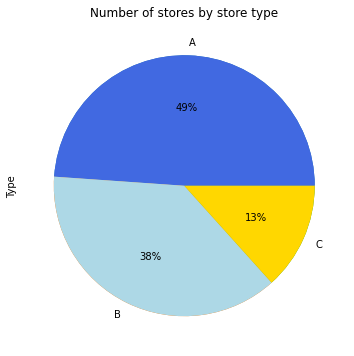

In [93]:
#Number of stores by store type
s.Type.value_counts().plot.pie(figsize=(8,6))
colors = ['royalblue','lightblue','gold']
plt.pie(s.Type.value_counts(),colors=colors,autopct='%.0f%%')
plt.title('Number of stores by store type')

Text(0.5, 1.0, 'Total weekly sales by store type')

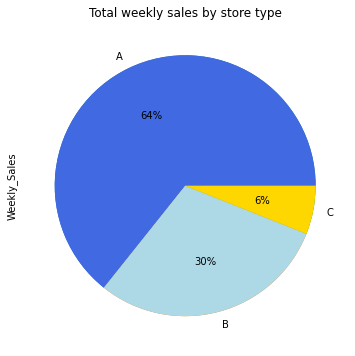

In [94]:
#Total weekly sales by store type
data.groupby('Type').Weekly_Sales.sum().plot.pie(figsize=(8,6))
colors = ['royalblue','lightblue','gold']
plt.pie(data.groupby('Type').Weekly_Sales.sum(),colors=colors,autopct='%.0f%%')
plt.title('Total weekly sales by store type')

Text(0.5, 1.0, 'Weekly sales by store size and type')

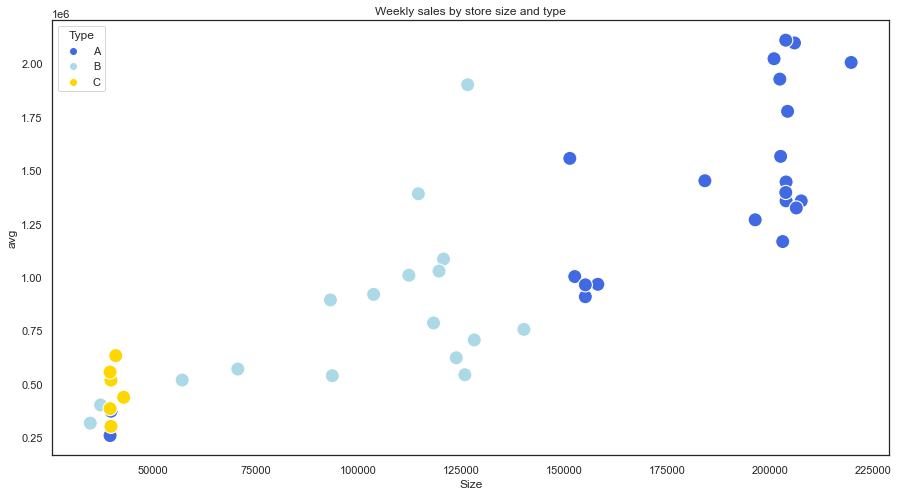

In [97]:
#Weekly sales by store size and type
plt.figure(figsize=(15,8))
sns.set_style("white")
sns.scatterplot(data=s, x='Size', y='avg', hue='Type',palette=['royalblue','lightblue','gold'],s=200)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Weekly sales by store size and type')

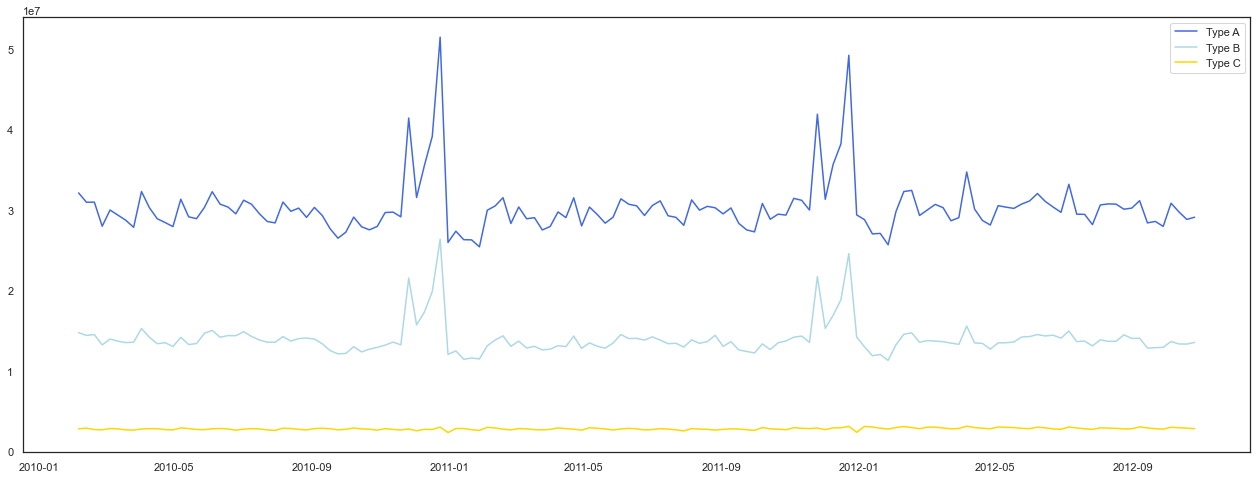

In [101]:
# Store Type Weekly Sales Trend
type_weekly_sales = data.groupby(['Date','Type'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(22,8))
sns.set_style("white")
plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="A"],label='Type A',color='royalblue')
plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="B"],label='Type B',color='lightblue')
plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="C"],label='Type C',color='gold')

plt.legend()
plt.show()

In [102]:
#Average Department Weekly Sales

dept_weekly_sales = data.groupby(['Dept','Date','Type'])['Weekly_Sales'].sum().reset_index()\
                    .groupby(['Dept','Type'])['Weekly_Sales'].mean().reset_index()
dept_weekly_sales.rename(columns={'Weekly_Sales': 'Weekly_Sales_by_Dept'}, inplace=True)
dept_weekly_sales

pivot = pd.pivot_table(data=dept_weekly_sales, index=['Dept'], columns=['Type'], values='Weekly_Sales_by_Dept')
pivot

Type,A,B,C
Dept,,,
1,505051.53,305844.89,53710.40
2,1143882.85,731883.95,86549.11
3,305382.73,220412.04,4921.66
4,725423.91,361418.23,82016.22
5,583865.32,360138.25,4299.64
...,...,...,...
95,2136068.57,702181.08,303849.39
96,379648.77,42076.17,94596.15
97,486063.76,59268.72,80517.26


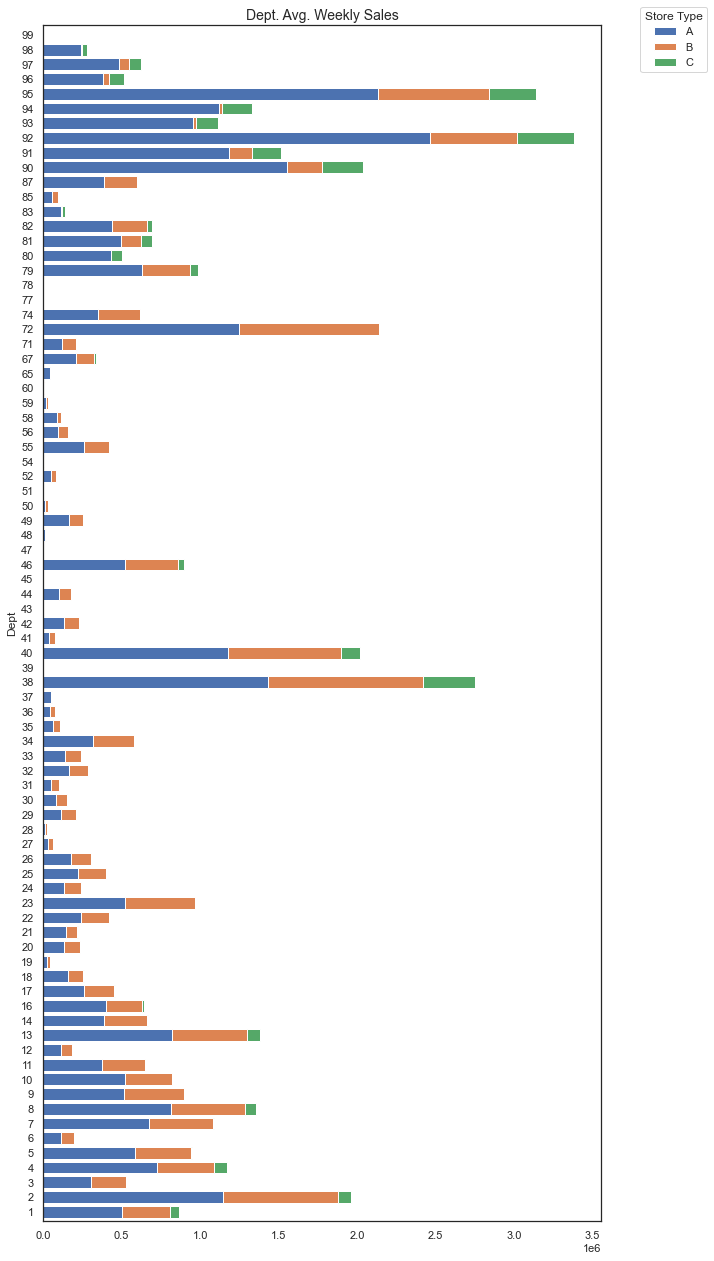

In [105]:
ax = pivot.plot.barh(stacked=True, figsize=(10,22),width=0.8)
ax.set_title('Dept. Avg. Weekly Sales', fontsize=14)
plt.legend(title='Store Type',bbox_to_anchor=(1.2, 1.02))

### Stores performance

In [107]:
df_typeA = data[data['Type']=='A']
df_typeB = data[data['Type']=='B']
df_typeC = data[data['Type']=='C']

/var/folders/c2/1tnqmf6d7bn3vn454gkflvgr0000gn/T/ipykernel_61734/2963759875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeA['year'] = pd.to_datetime(df_typeA['Date']).dt.year


Text(0.5, 1.0, 'Type A Stores Weekly_Sales across different stores')

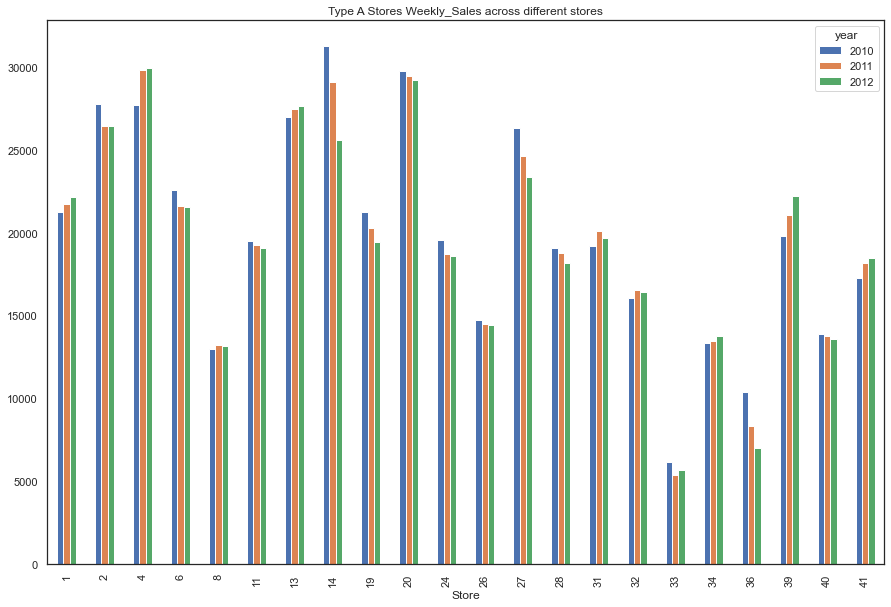

In [108]:
#Store performance in Type A
df_typeA['year'] = pd.to_datetime(df_typeA['Date']).dt.year
df_typeA.groupby(['Store','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Type A Stores Weekly_Sales across different stores')

/var/folders/c2/1tnqmf6d7bn3vn454gkflvgr0000gn/T/ipykernel_61734/2350325143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeB['year'] = pd.to_datetime(df_typeB['Date']).dt.year


Text(0.5, 1.0, 'Type B Stores Weekly_Sales across different stores')

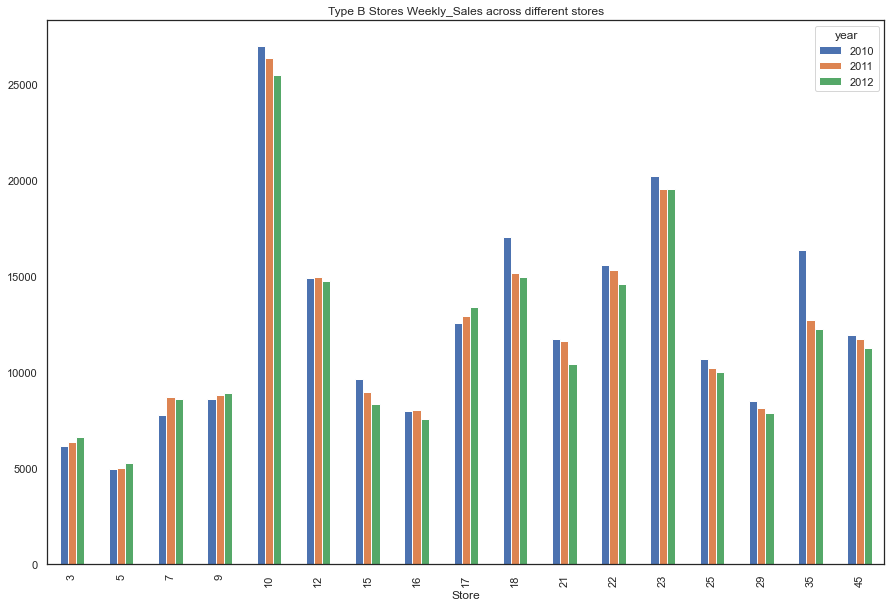

In [109]:
#Store performance in Type B
df_typeB['year'] = pd.to_datetime(df_typeB['Date']).dt.year
df_typeB.groupby(['Store','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Type B Stores Weekly_Sales across different stores')

/var/folders/c2/1tnqmf6d7bn3vn454gkflvgr0000gn/T/ipykernel_61734/353622174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeC['year'] = pd.to_datetime(df_typeC['Date']).dt.year


Text(0.5, 1.0, 'Type C Stores Weekly_Sales across different stores')

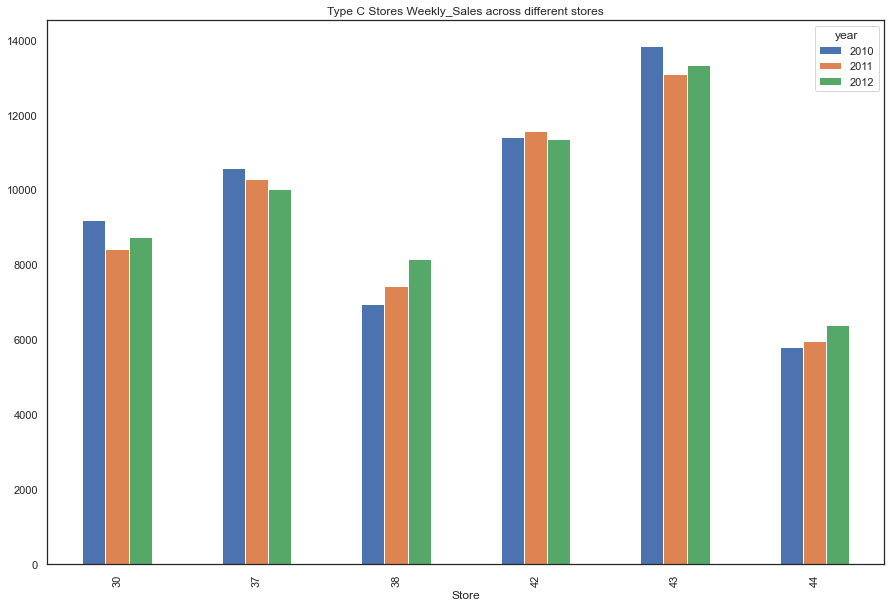

In [111]:
#Store performance in Type C
df_typeC['year'] = pd.to_datetime(df_typeC['Date']).dt.year
df_typeC.groupby(['Store','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Type C Stores Weekly_Sales across different stores')

Text(0.5, 1.0, 'Heatmap by dept by store')

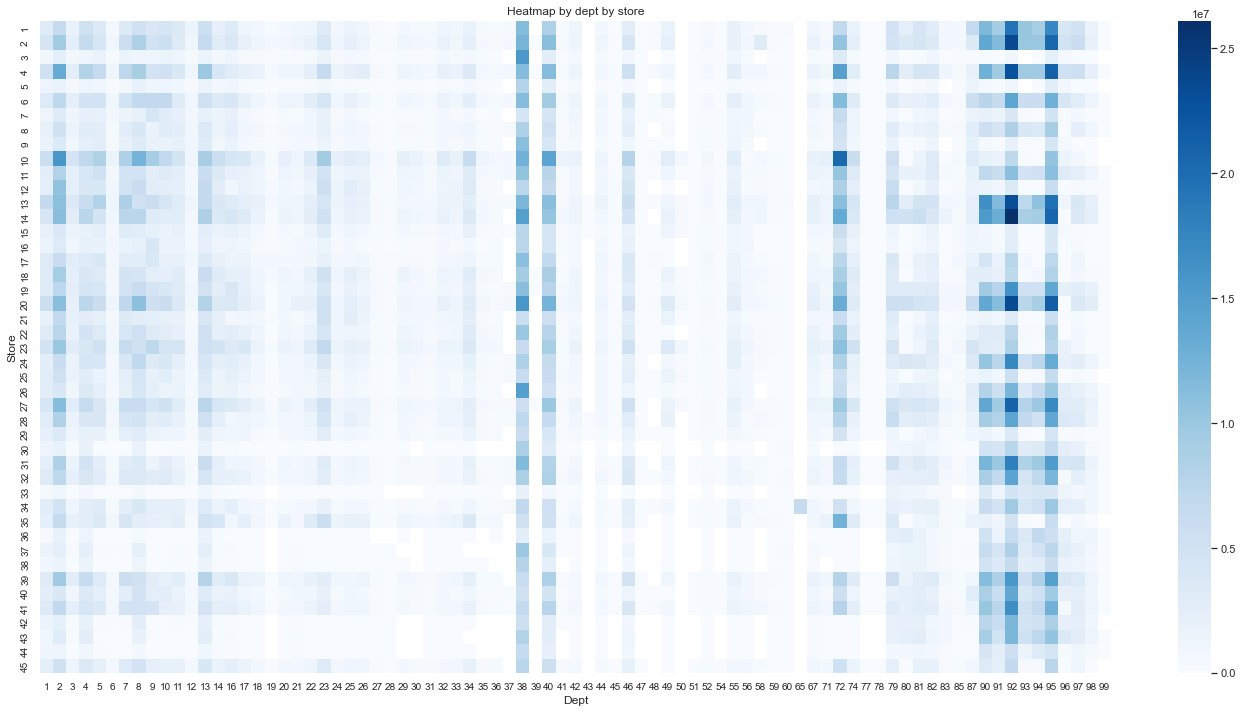

In [112]:
#Heatmap by dept by store
st_dept = data.groupby(['Store','Dept']).Weekly_Sales.sum().unstack()
plt.figure(figsize=(24,12))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.heatmap(st_dept, cmap='Blues', annot=False)
plt.title('Heatmap by dept by store') 